In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
dataset = pd.read_csv('/home/gray/Desktop/dataset/Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
dataset['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [5]:
dataset['Gender'] = np.where(dataset['Gender'] =='Male', 1, dataset['Gender'])
dataset['Gender'] = np.where(dataset['Gender'] =='Female', 0, dataset['Gender'])

In [6]:
dataset['Gender']
dataset["Gender"] = dataset["Gender"].astype('int64')
dataset['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [7]:
df = dataset.iloc[:, :]
corrmat = df.corr()

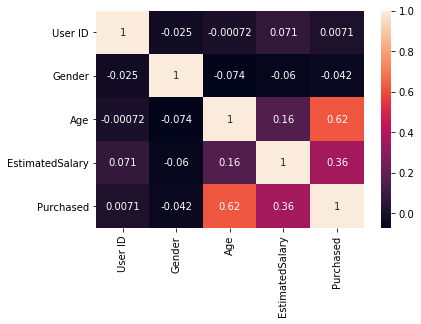

In [8]:
sn.heatmap(corrmat, annot=True)
plt.show()

In [9]:
X = dataset.iloc[: , [ 2]]
Y = dataset.iloc[:, [4]]

In [10]:
X.head()

,Age
0,19
1,35
2,26
3,27
4,19


In [11]:
Y.shape

(400, 1)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state = 9)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_train = np.array((Y_train))
Y_test.reshape(-1, 1)
Y_train.reshape(-1,1)

In [14]:
print('{} {} {} {}'.format(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape))

(320, 1) (80, 1) (320, 1) (80, 1)


In [15]:
def normalise(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis=0)
    X = (X-mean)/std
    print(mean)
    print(std)
    return X

def biasing(x):
    n = x.shape[0]
    arr = np.ones((n, 1))
    x = np.hstack((arr, x))
    return x

In [16]:
X_train = normalise(X_train)

[37.721875]
[10.56885857]


In [17]:
X_train

array([[-0.91986045],
       [-1.58218363],
       [ 0.12093312],
       [ 2.10790265],
       [ 0.6886387 ],
       [ 1.06710909],
       [-0.25753727],
       [ 0.31016831],
       [-0.06830208],
       [ 0.40478591],
       [-1.10909564],
       [ 0.87787389],
       [ 1.16172668],
       [-1.39294843],
       [ 0.40478591],
       [ 1.91866746],
       [ 0.97249149],
       [ 1.35096188],
       [-0.06830208],
       [ 0.31016831],
       [-0.63600766],
       [-0.25753727],
       [ 0.6886387 ],
       [-0.91986045],
       [-0.06830208],
       [-0.25753727],
       [ 0.97249149],
       [-1.01447805],
       [ 0.21555071],
       [ 0.97249149],
       [-1.48756603],
       [ 1.06710909],
       [-1.01447805],
       [-1.01447805],
       [ 0.21555071],
       [-1.10909564],
       [ 1.54019707],
       [-1.10909564],
       [ 2.01328505],
       [-1.77141882],
       [ 1.91866746],
       [ 0.40478591],
       [-0.91986045],
       [ 2.10790265],
       [-0.25753727],
       [-0

In [18]:
def sigmoid_func(theta, x):
    temp = x@theta
    return 1/(1 + np.exp(-temp))

In [19]:
def likelihood(x, y, w):
    sig = np.log(sigmoid_func(w, x))
    #print(sig)
    part1 = y.T@sig
    part2 = ((1-y).T)@np.log(1 - sigmoid_func(w, x))
    return part1+part2

In [20]:
def gradient_ascent(x, y, w, alpha, itr):
    J = []
    initial = np.sum(likelihood(x, y, w))
    J.append(initial)
    N = x.shape[0]
    for i in range(0, itr):
        d = (y - sigmoid_func(w, x))
        w = w + (alpha*x.T@d)/N
        cost = likelihood(x, y, w)
        J.append(np.sum(cost))
    return J, w


In [21]:
theta = np.zeros((X_train.shape[1]+1, 1))
theta.shape

(2, 1)

In [22]:
X_train1 = biasing(X_train)
J, w1 = gradient_ascent(X_train1, Y_train, theta, 0.09, 1000)

In [23]:
Y_train.shape
print(w1)

[[-0.98822074]
 [ 1.95378648]]


In [ ]:
print(J)

In [ ]:
X_test = normalise(X_test)
X_test1 = biasing(X_test)
Y_pred = sigmoid_func(w1, X_test1)

In [ ]:
# h = sigmoid_func(w1, X_test1) ## sigmoid function update
# print(h)
# theta -= 0.005/m*np.dot((h-(Y_test1)).T,X_test).T ## theta update
    
# h = sigmoid(np.dot(x_test,theta))

In [28]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, Y_test)
print(score)
print(predictions)

0.85
[0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1
 0 0 0 0 1 0]


/home/gray/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
res=[]
for i in range(0, Y_pred.shape[0]):
    if(Y_pred[i]>=0.5):
        res.append(1)
    else:
        res.append(0)

In [30]:
true = 0
false = 0
for i in range(Y_test.shape[0]):
    if(Y_test[i] == res[i]):
        true+=1
    else:
        false+=1

print(true/(true+false))

0.85
